Figures to add to appendix:
1. Redo Fig 2b and show absoloute time on x-axis (use log scale for y-axis)
2. Show key services driving changes in Fig 2b
3. Show cumulative total of total visits to GOVUK service webpages in 2022

## Imports

In [1]:
import nltk
from pathlib import Path
import pandas as pd
import networkx as nx
import seaborn as sns
import matplotlib.pyplot as plt
from matplotlib import rcParams
from nltk import word_tokenize, pos_tag
from nltk.corpus import wordnet
from nltk.stem import WordNetLemmatizer

### Figure SM1

findfont: Font family 'Arial' not found.
findfont: Font family 'Arial' not found.
findfont: Font family 'Arial' not found.
findfont: Font family 'Arial' not found.
findfont: Font family 'Arial' not found.
findfont: Font family 'Arial' not found.
findfont: Font family 'Arial' not found.
findfont: Font family 'Arial' not found.
findfont: Font family 'Arial' not found.
findfont: Font family 'Arial' not found.
findfont: Font family 'Arial' not found.
findfont: Font family 'Arial' not found.
findfont: Font family 'Arial' not found.
findfont: Font family 'Arial' not found.
findfont: Font family 'Arial' not found.
findfont: Font family 'Arial' not found.
findfont: Font family 'Arial' not found.
findfont: Font family 'Arial' not found.
findfont: Font family 'Arial' not found.
findfont: Font family 'Arial' not found.
findfont: Font family 'Arial' not found.
findfont: Font family 'Arial' not found.
findfont: Font family 'Arial' not found.
findfont: Font family 'Arial' not found.
findfont: Font f

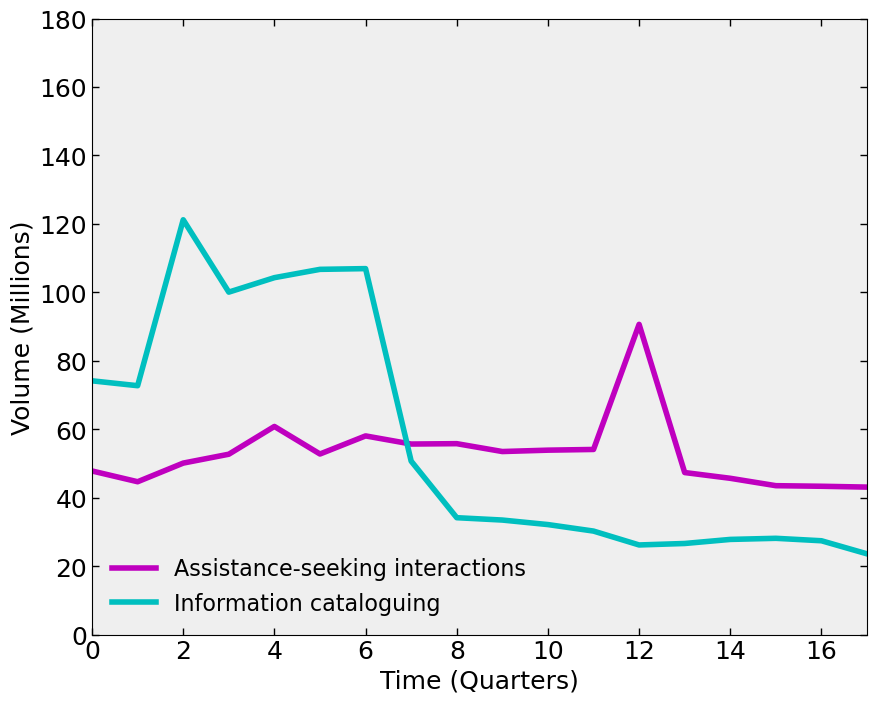

In [8]:
def plot_transactions_data(save=False):
    """
    Load and plot processed transactions data.
    """

    transactions_data = pd.read_csv(Path('../data/processed/201204-201703-service-transactions-processed.csv'))

    # Remove passenger arrivals
    transactions_df = transactions_data.loc[transactions_data['service'] != 'Passenger arrivals at the UK border']

    # Create a dictionary to map digital columns to non-digital counterparts
    column_mapping = {}
    for col in transactions_df.columns:
        if 'digital' in col:
            quarter = col[:-7]  # Remove 'digital' to get the quarter
            column_mapping[col] = quarter

    #### Per Servicetype
    # Group by 'Servicetype'/'Service' and sum the columns
    servicetype_grouped_df = transactions_df.groupby('Servicetype').agg({col: 'sum' for col in column_mapping.values()})

    # Rename the columns
    servicetype_grouped_df = servicetype_grouped_df.rename(columns=column_mapping)

    # Reset the index to make 'Servicetype' a regular column
    servicetype_grouped_df.reset_index(inplace=True)

    # Reshape the DataFrame using melt
    melted = pd.melt(servicetype_grouped_df, id_vars=['Servicetype'], var_name='Quarter', value_name='Volume')

    # Convert the 'Year' column to an integer
    melted['Quarter'] = melted['Quarter'].astype(int)

    # Group by 'Servicetype' and 'Year' and calculate the sum of 'Volume'
    final_df = melted.groupby(['Servicetype', 'Quarter'])['Volume'].sum().reset_index()

    # Convert 'Quarter' column to a datetime format for easier comparison
    final_df['Quarter'] = pd.to_datetime(final_df['Quarter'], format='%Y%m')

    # Sort the DataFrame by 'Servicetype' and 'Quarter'
    final_df = final_df.sort_values(by=['Servicetype', 'Quarter'])

    # Define a mapping of new 'Servicetype' values
    servicetype_mapping = {
        'Requesting a licence or consent': 'Assistance-seeking interactions',
        'Requesting benefits payments or loans': 'Assistance-seeking interactions',
        'Booking events and resources': 'Assistance-seeking interactions',
        'Making a payment': 'Assistance-seeking interactions',
        'Ordering goods': 'Assistance-seeking interactions',
        'Registering': 'Information cataloguing',
        'Providing information': 'Information cataloguing',
        'Requesting information': 'Information cataloguing',
        'Amending/deleting information': 'Information cataloguing',
    }

    # Apply the mapping to create a new 'Servicetype' column
    final_servicetype_df = final_df.copy()
    final_servicetype_df['NewServicetype'] = final_df['Servicetype'].map(servicetype_mapping)

    # Group by the new 'Servicetype' column and sum the values for all other columns
    collapsed_df = final_servicetype_df.groupby(['NewServicetype', 'Quarter']).sum().reset_index()

    # Create quarter mapping
    quarter_mapping = dict(zip(list(collapsed_df.Quarter.unique()), list(range(0, 18, 1))))
    collapsed_df['Quarter'] = collapsed_df['Quarter'].map(quarter_mapping)

    # Convert 'Volume' to millions
    collapsed_df['Volume_Millions'] = collapsed_df['Volume'] / 1000000

    # Create a time series plot for 'InitialDeltaPerc' with customizations
    plt.figure(figsize=(10, 8))

    # Determine the color palette based on the final values
    color_dict = {
        'Information cataloguing': 'c',
        'Assistance-seeking interactions': 'm'

    }

    plt.tick_params(
        axis='both',
        which='both',
        direction='in',
        top=True,
        right=True,
        bottom=True,
        left=True,
        labelsize=18,
        width=1,
        length=5
    )

    # Plot lines for individual 'NewServicetype' values with custom colors
    for newservicetype in collapsed_df['NewServicetype'].unique():
        data = collapsed_df[collapsed_df['NewServicetype'] == newservicetype]
        y_data = data['Volume_Millions']

        # Use the corresponding color for the 'Servicetype'
        color = color_dict[newservicetype]

        # Plot the line with a color representing the final value
        plt.plot(data['Quarter'], y_data, label=newservicetype, color=color, linewidth=4)

    # Set the face color
    plt.gca().set_facecolor('#efefef')

    # Set axis labels and font size
    plt.xlabel('', fontsize=18)
    plt.ylabel('', fontsize=18)

    plt.legend(title='', frameon=False,
               loc='lower left',
               prop={'family': 'Arial', 'size': 16}
              )
    plt.title('')
    plt.xlabel('Time (Quarters)', fontname='Arial')
    plt.ylabel('Volume (Millions)', fontname='Arial')
    plt.ylim((0, 180))
    plt.xlim(0, 17)
    
    # Save figure
    if save == True:
        plt.savefig(Path("../reports/figures/supplementary-figures/figSM1.png"), dpi=300, bbox_inches='tight')
    else:
        plt.show()

plot_transactions_data(save=True)

#### Figure SM1 inset

<Figure size 1000x800 with 0 Axes>

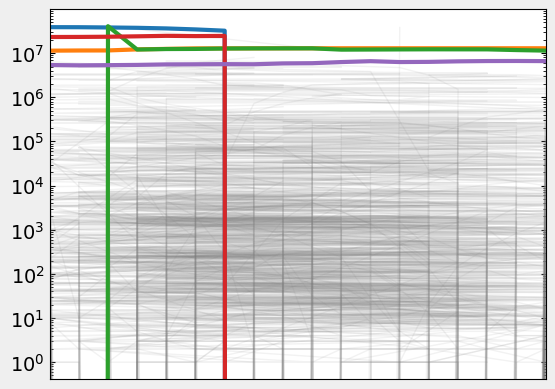

In [12]:
def plot_transactions_inset_data(save=False):

    # Load data
    transactions_data = pd.read_csv(Path('../data/processed/201204-201703-service-transactions-processed.csv'))

    # Remove passenger arrivals
    transactions_df = transactions_data.loc[transactions_data['service'] != 'Passenger arrivals at the UK border']
    
    # Create a dictionary to map digital columns to non-digital counterparts
    column_mapping = {}
    for col in transactions_df.columns:
        if 'digital' in col:
            quarter = col[:-7]  # Remove 'digital' to get the quarter
            column_mapping[col] = quarter
    
    # Get service dataframe
    service_grouped_df = transactions_df.groupby('service').agg({col: 'sum' for col in column_mapping.values()})
    service_grouped_df = service_grouped_df.rename(columns=column_mapping)
    service_grouped_df.reset_index(inplace=True)
    service_melted_df = pd.melt(service_grouped_df, id_vars=['service'], var_name='Quarter', value_name='Volume')
    service_melted_df['Quarter'] = service_melted_df['Quarter'].astype(int)
    service_df = service_melted_df.groupby(['service', 'Quarter'])['Volume'].sum().reset_index()
    service_df['Quarter'] = pd.to_datetime(service_df['Quarter'], format='%Y%m')
    service_df = service_df.sort_values(by=['service', 'Quarter'])

    # Create quarter mapping
    quarter_mapping = dict(zip(list(service_df.Quarter.unique()), list(range(0, 18, 1))))
    service_df['Quarter'] = service_df['Quarter'].map(quarter_mapping)

    # Create a time series plot for 'InitialDeltaPerc' with customizations
    plt.figure(figsize=(10, 8))

    # Face color
    plt.figure(facecolor='#efefef')
    
    # Sort the data by volume in descending order
    sorted_data = service_df.sort_values(by='Volume', ascending=False)

    # Plot lines for individual 'NewServicetype' values with custom colors
    for service in sorted_data['service'].unique():
        data = sorted_data[sorted_data['service'] == service]
        y_data = data['Volume']

        # Use the corresponding color for the 'Servicetype'
        # color = color_dict[servicetype]

        # Plot the line with a color representing the final value
        plt.plot(data['Quarter'], y_data, label=service, color='gray', alpha=.1, linewidth=1) 


    for top_service in service_df.groupby('service')[['Volume']].sum().sort_values(
        by='Volume', ascending=False).head(5).reset_index().service:
        data = service_df[service_df['service'] == top_service]
        y_data = data['Volume']

        # Use the corresponding color for the 'Servicetype'
        # color = color_dict[servicetype]

        # Plot the line with a color representing the final value
        plt.plot(data['Quarter'], y_data, label=service, linewidth=3) 


    plt.tick_params(
        axis='both',
        which='both',
        direction='in',
        top=True,
        right=True,
        bottom=True,
        left=True,
    )

    plt.title('')
    plt.xlabel('')
    plt.ylabel('')
    plt.yscale('log')
    plt.xlim(0, 17)
    plt.xticks([])
    plt.yticks(fontsize=14)

    # Save figure
    if save == True:
        plt.savefig(Path("../reports/figures/supplementary-figures/figSM1-inset.png"), dpi=300, bbox_inches='tight')
    else:
        plt.show()

plot_transactions_inset_data(save=True)

**Interpretation**
- There is a change from information cataloguing to interactive services
- Overall transactions stay relatively stable over time
- The patterns can mostly be accounted for by trends in a few major services that either disappear or persist

### Figure SM2

/tmp/ipykernel_8162/606286417.py:96: MatplotlibDeprecationWarning: The legendHandles attribute was deprecated in Matplotlib 3.7 and will be removed two minor releases later. Use legend_handles instead.
  for handle in legend.legendHandles:


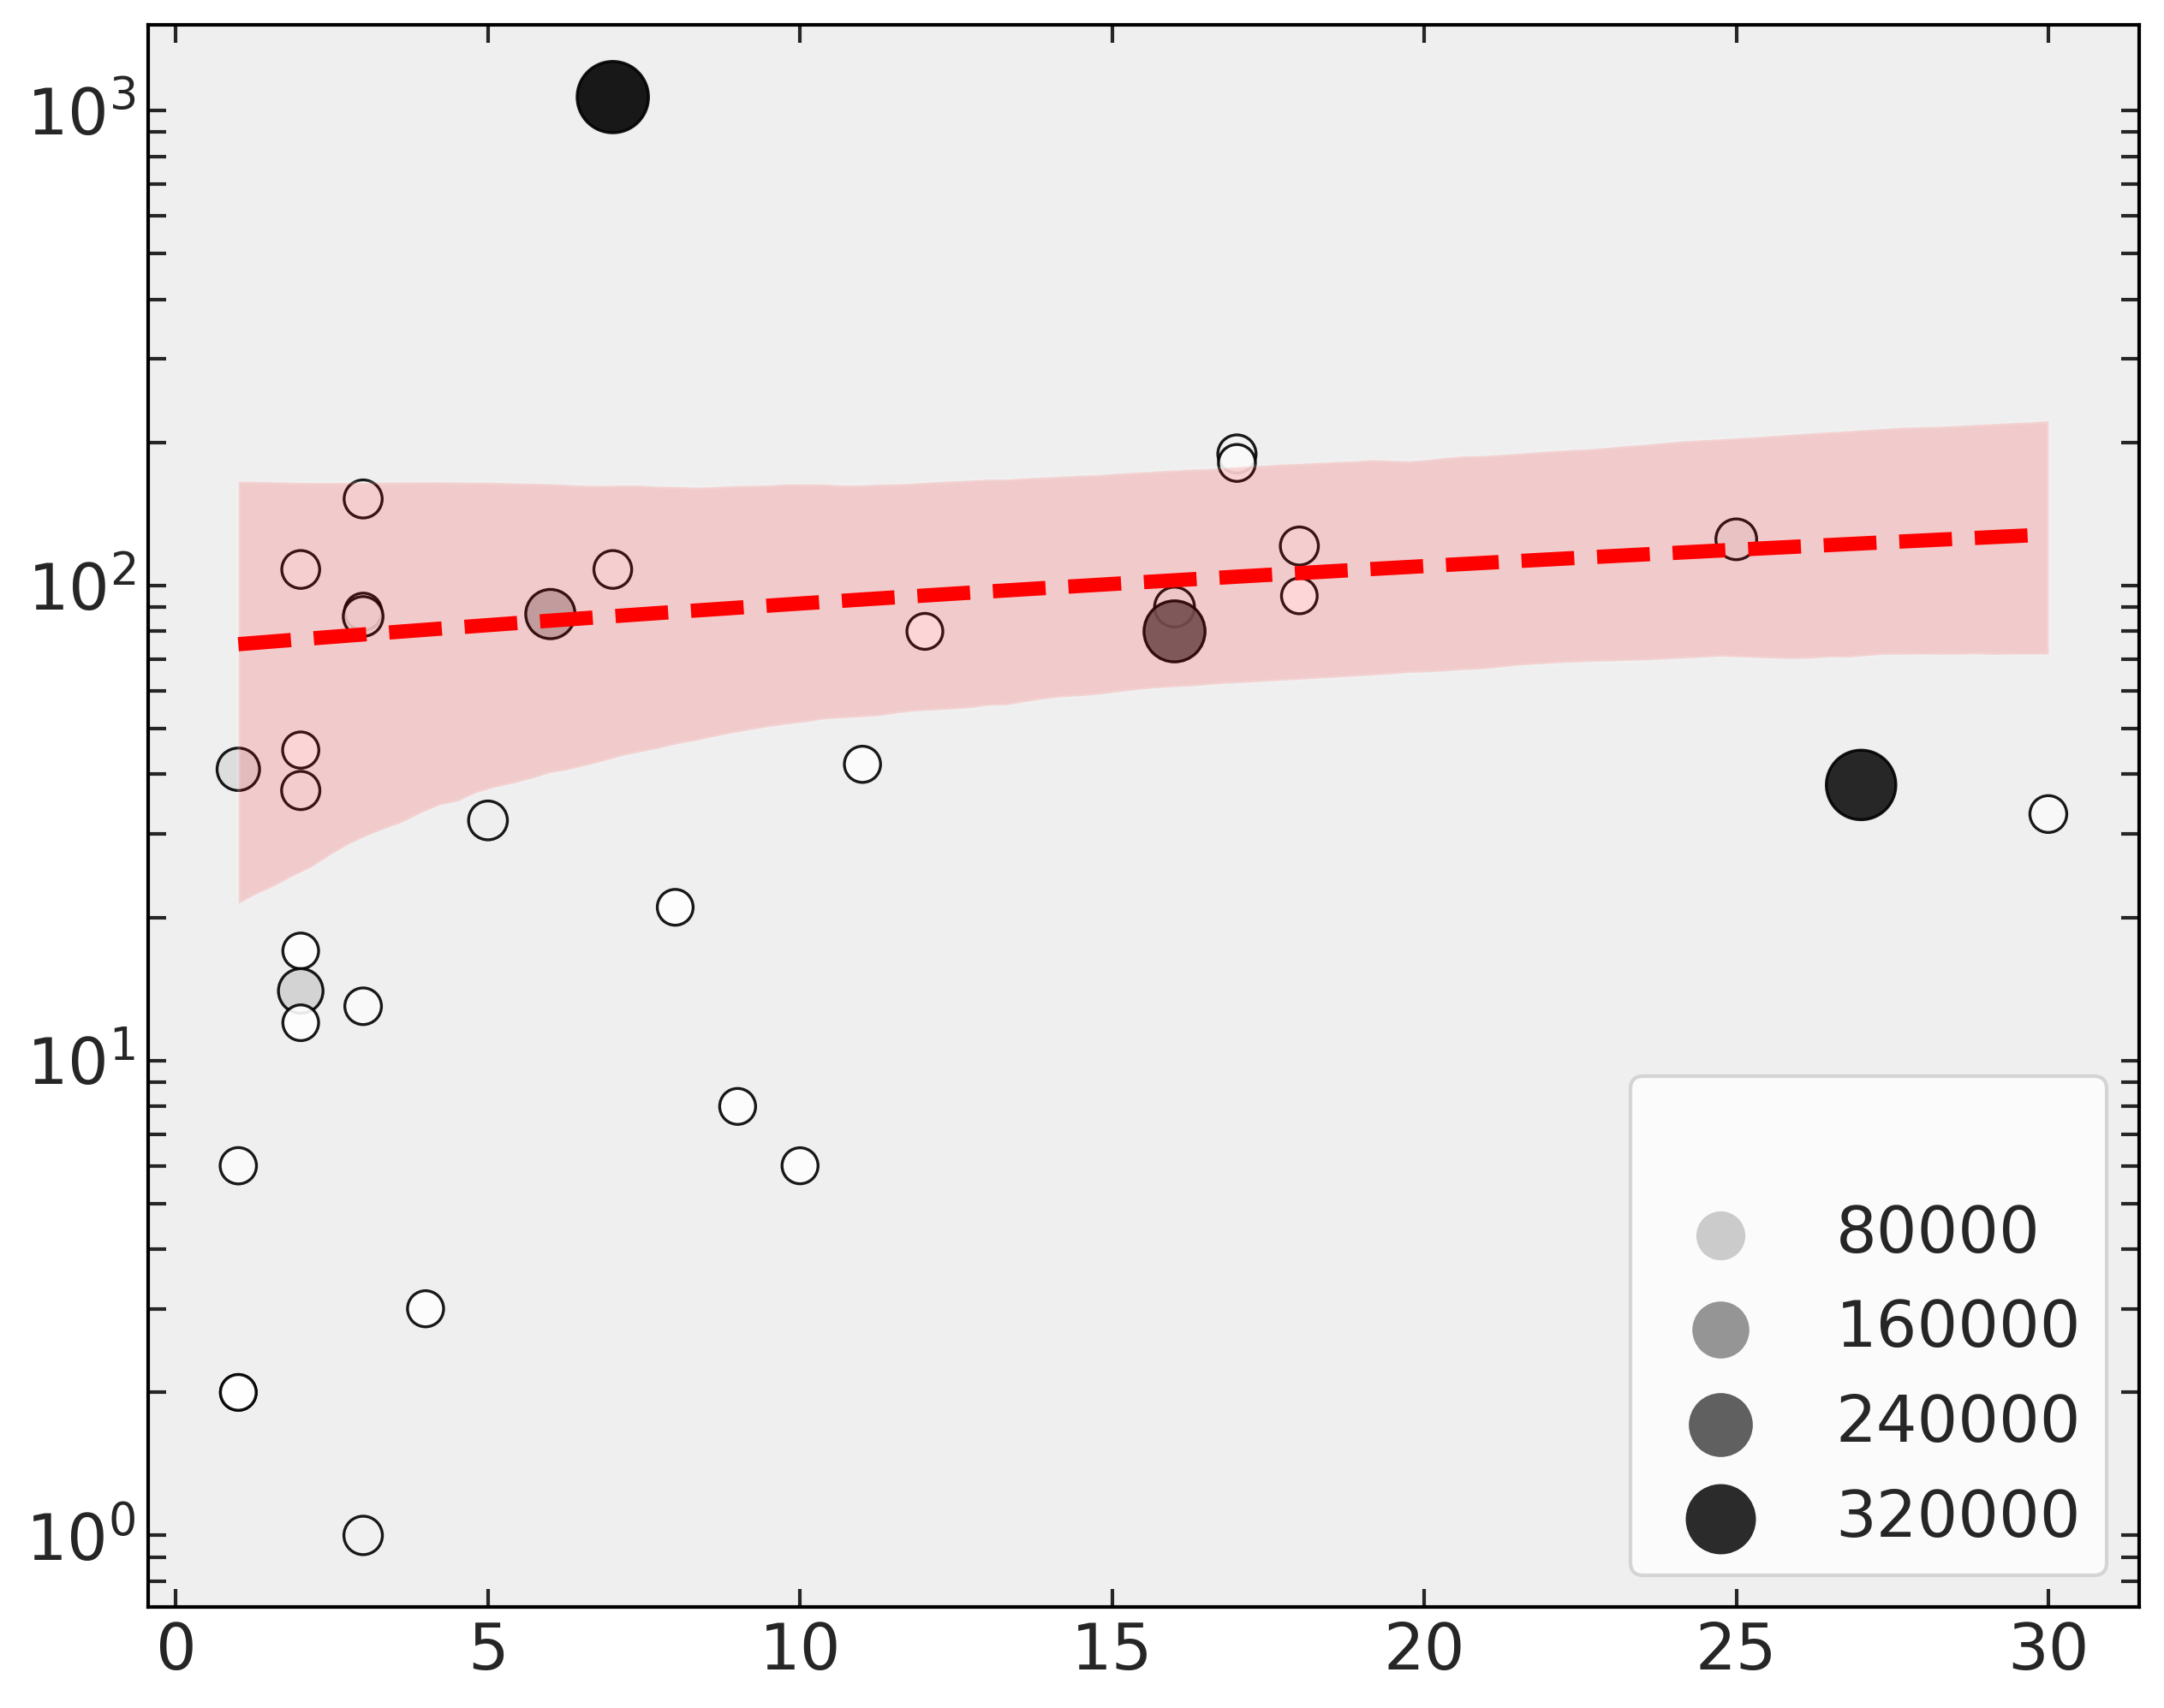

In [14]:
import numpy as np
import pandas as pd
import seaborn as sns
from scipy.stats import pearsonr
from matplotlib import rcParams
import matplotlib.pyplot as plt
from matplotlib.lines import Line2D


def plot_forms_data(save=False):
    """
    Load and plot processed forms data.
    """
    
    # Load data  
    form_count_2022_df = pd.read_excel(Path('../data/processed/202212-govuk-organisations-with-forms-processed.xlsx'))
    form_views_2022_df = pd.read_excel(Path('../data/processed/202211-form-services-pageviews-processed.xlsx'))
    services_2023_df = pd.read_excel(Path('../data/processed/202308-services-list-processed.xlsx'))
    
    # Rename the 'total' column to 'form_count'
    form_count_2022_df = form_count_2022_df.rename(columns={'total': 'form_count'})
    
    # Group by and get the sum of 'form_views'
    form_views_2022_df = form_views_2022_df.groupby(
    'organisation')[['views']].sum().reset_index()
    form_views_2022_df.rename(columns={'views': 'form_views'}, inplace=True)
    
    # Group by 'organisation', count 'service', and find the most common 'topic'
    services_2023_df = services_2023_df.groupby('organisation').agg({
    'service': 'count',
    'topic': lambda x: x.mode().iloc[0] if not x.empty else None
    }).reset_index()
    
    # Rename  columns
    services_2023_df.columns = ['organisation', 'service_count', 'topic']
    
    # Create a new DataFrame with the selected columns
    services_2023_df = services_2023_df[['organisation', 'service_count', 'topic']]
    
    # Merge the two DataFrames on 'organisation'
    merged_df = pd.merge(form_count_2022_df, form_views_2022_df, on='organisation')
    merged_df = pd.merge(merged_df, services_2023_df, on='organisation', how='inner')
    
    # Compute the Pearson correlation coefficient between 'service_count' and 'form_count'
    corr_coefficient, _ = pearsonr(merged_df['service_count'], np.log(merged_df['form_count']))
    
    # Set font to Helvetica
    plt.rcParams['font.family'] = 'Helvetica'
    
    # Create a bubble plot with a regression line
    plt.figure(figsize=(10, 8), dpi=300)
    sns.set_style("whitegrid")  # Remove gridlines
    
    # Plot form_count against services on logarithmic scales, color-coded by 'topic'
    g = sns.scatterplot(
    data=merged_df, 
    x='service_count', 
    y='form_count', 
    size=merged_df['form_views'], 
    sizes=(100, 400), 
    hue=merged_df['form_views'],
    palette='gist_yarg',
    marker='o', 
    alpha=0.9)
    
    # Set y-axis to logarithmic scale
    plt.yscale('log')
    
    # Set the face color
    plt.gca().set_facecolor('#efefef')
    
    # Remove gridlines
    plt.grid(False)
    
    # Add major and minor ticks facing inwards
    plt.tick_params(
    axis='both',
    which='both',
    direction='in',
    top=True,
    right=True,
    bottom=True,
    left=True,
    labelsize=18,
    width=1,
    length=5
    )
    
    # Set border color to black
    g.get_children()[0].set_edgecolor('black')
    
    # Add a legend 
    legend = plt.legend(title=' ', loc='lower right', fontsize=18, title_fontsize=20)
    
    # Set marker scale to 3.5 only for 'topic'
    for handle in legend.legendHandles:
        if str(handle.get_label()) in merged_df.topic.unique():
            handle._sizes = [3.5] if handle.get_label() in merged_df.topic.unique() else [3.5]
    
    # Set the title to include the Pearson correlation coefficient
    # plt.title(f'Pearson $ρ$ = {corr_coefficient:.2f}\n', fontsize=20)
    
    # Add a regression line to the scatterplot
    sns.regplot(data=merged_df, 
            x='service_count', 
            y='form_count', 
            scatter=False, 
            ax=g, 
            color='red', 
            line_kws={"linestyle": "--",
                      "linewidth": 4})
    
    
    # Modify the spines
    g.spines['top'].set_color('black')   
    g.spines['right'].set_color('black')  
    g.spines['left'].set_linewidth(1)
    g.spines['left'].set_color('black')
    g.spines['bottom'].set_linewidth(1)
    g.spines['bottom'].set_color('black')
    g.spines['right'].set_linewidth(1)
    g.spines['top'].set_linewidth(1)
    
    # Set axis labels and font size
    plt.xlabel('', fontsize=18)
    plt.ylabel('', fontsize=18)
    
    # Save figure
    if save == True:
        plt.savefig(Path("../reports/figures/supplementary-figures/figSM2.png"), dpi=300, bbox_inches='tight')
    else:
        plt.show()

plot_forms_data(save=True)

### Figure SM3

findfont: Font family 'Helvetica' not found.
findfont: Font family ['Helvetica'] not found. Falling back to DejaVu Sans.
findfont: Font family 'Helvetica' not found.
findfont: Font family 'Helvetica' not found.
findfont: Font family 'Helvetica' not found.
findfont: Font family 'Helvetica' not found.
findfont: Font family 'Helvetica' not found.
findfont: Font family 'Helvetica' not found.
findfont: Font family 'Helvetica' not found.
findfont: Font family 'Helvetica' not found.
findfont: Font family 'Helvetica' not found.
findfont: Font family 'Helvetica' not found.
findfont: Font family 'Helvetica' not found.
findfont: Font family 'Helvetica' not found.
findfont: Font family 'Helvetica' not found.
findfont: Font family 'Helvetica' not found.
findfont: Font family 'Helvetica' not found.
findfont: Font family 'Helvetica' not found.
findfont: Font family 'Helvetica' not found.
findfont: Font family 'Helvetica' not found.
findfont: Font family 'Helvetica' not found.
findfont: Font family 'H

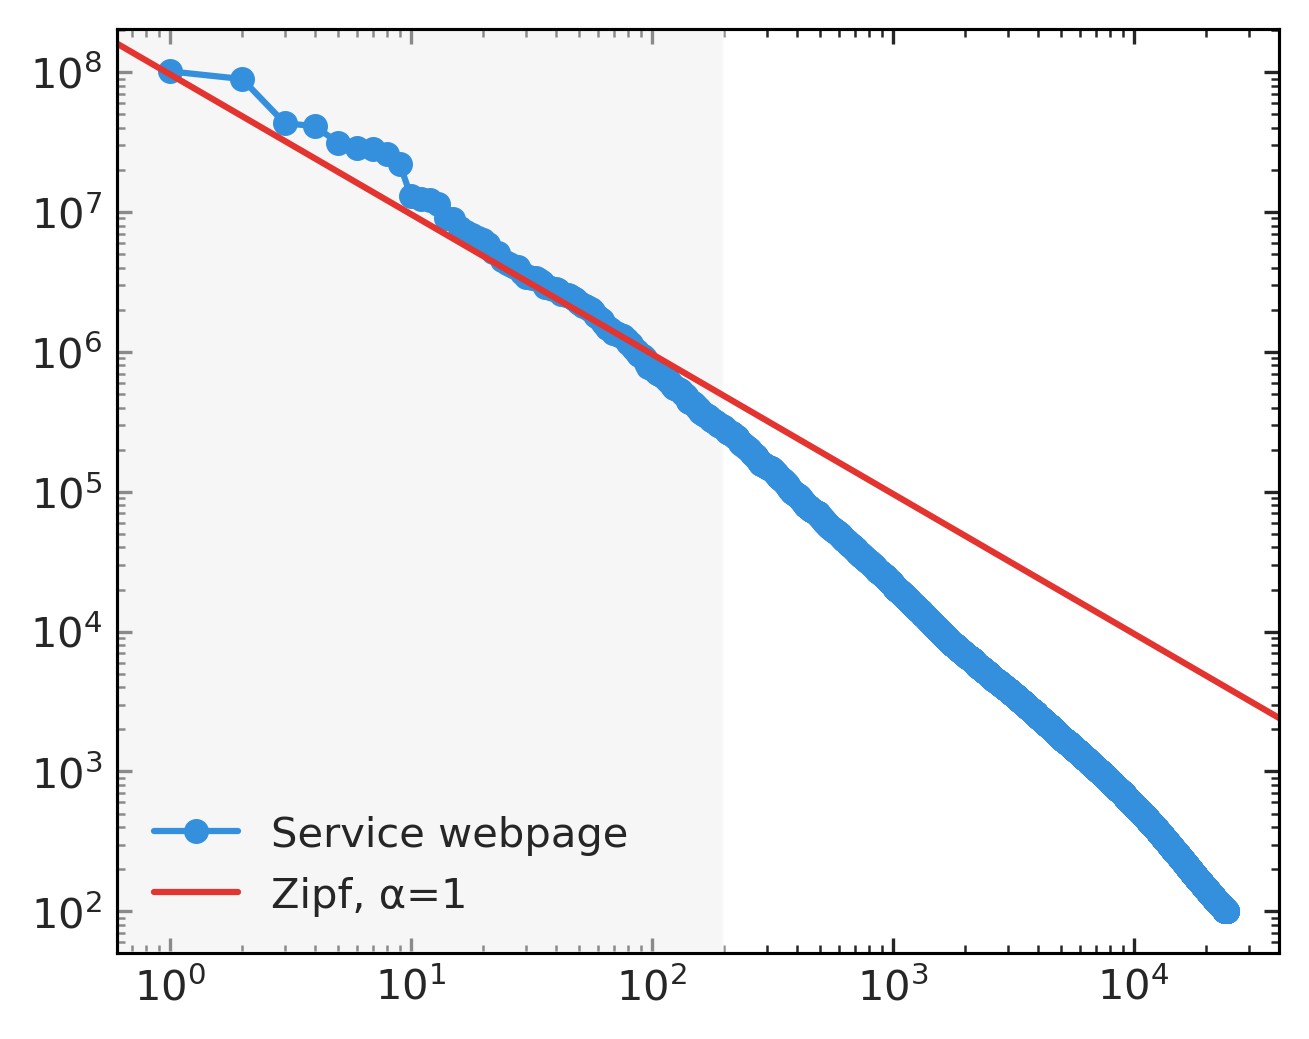

In [15]:
import pandas as pd
import matplotlib.pyplot as plt
from matplotlib import ticker
import numpy as np

def plot_visits_data(save=False):
    """
    Load and plot processed visitor data.
    """

    # Load and preprocess the data
    visits2022_data = pd.read_excel('../data/processed/202110-202209-govuk-unique-visitors-processed.xlsx')
    visits_data = visits2022_data[['Page', 'Unique clicks']].dropna(subset=['Unique clicks'], how='any')
    visits_data.rename(columns={'Unique clicks': 'visits', 'Page': 'page'}, inplace=True)
    visits_data.sort_values('visits', ascending=False, inplace=True)

    n = len(visits_data)
    ranks = range(1, n+1)
    visits_data['rank'] = ranks
    freqs = list(visits_data.visits)

    # Create the figure and axis
    figure = plt.figure(figsize=(5, 4), dpi=300)
    plt.rcParams["font.family"] = "Helvetica"
    ax = plt.subplot()

    line1, = ax.plot(ranks, freqs, linestyle="-", color='#3490dc', fillstyle='full',
                     marker="o", markersize=3, markeredgewidth=3, label='Service webpage')

    line2 = ax.axline((1, 96845562), slope=-1, color='#e3342f', label='Zipf, α=1')

    ax.set_xscale('log')
    ax.set_yscale('log')
    ax.grid(False)

    # Add a legend
    plt.legend(handles=[line1, line2], frameon=False, fancybox=False, loc='lower left',
               facecolor='white', framealpha=1, edgecolor='black', fontsize=10)

    # Highlight an area with axvspan
    plt.axvspan(0, 200, facecolor='#EFEFEF', alpha=0.5)

    # Add major and minor ticks facing inwards
    ax.tick_params(
        axis='both',
        which='both',
        direction='in',
        top=True,
        right=True,
        bottom=True,
        left=True
    )

    # Set the log scale on the y-axis
    plt.yscale("log")
    plt.xscale("log")

    # Modify the spines
    ax.spines['top'].set_color('black')
    ax.spines['right'].set_color('black')
    ax.spines['left'].set_linewidth(.75)
    ax.spines['left'].set_color('black')
    ax.spines['bottom'].set_linewidth(.75)
    ax.spines['bottom'].set_color('black')
    ax.spines['right'].set_linewidth(.75)
    ax.spines['top'].set_linewidth(.75)
    ax.spines['bottom'].set_linewidth(.75)

    # Save figure
    if save == True:
        plt.savefig("../reports/figures/supplementary-figures/figSM3.png", bbox_inches='tight', dpi=300)
    else:
        plt.show()

# Call the function to plot the data
plot_visits_data(save=True)

### Figure SM3 inset

/tmp/ipykernel_8162/1103909235.py:15: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  visits12_df['visits'] = visits12_df.sum(axis=1, numeric_only=True)
/tmp/ipykernel_8162/1103909235.py:62: MatplotlibDeprecationWarning: An artist whose label starts with an underscore was passed to legend(); such artists will no longer be ignored in the future.  To suppress this warning, explicitly filter out such artists, e.g. with `[art for art in artists if not art.get_label().startswith('_')]`.
  plt.legend(
findfont: Font family 'Helvetica' not found.
findfont: Font family 'Helvetica' not found.
findfont: Font family 'Helvetica' not found.
findfont: Font family 'Helvetica' not found.
findfont: Font family 'Helvetica' not found.
findfont: Font family 'Helvetica

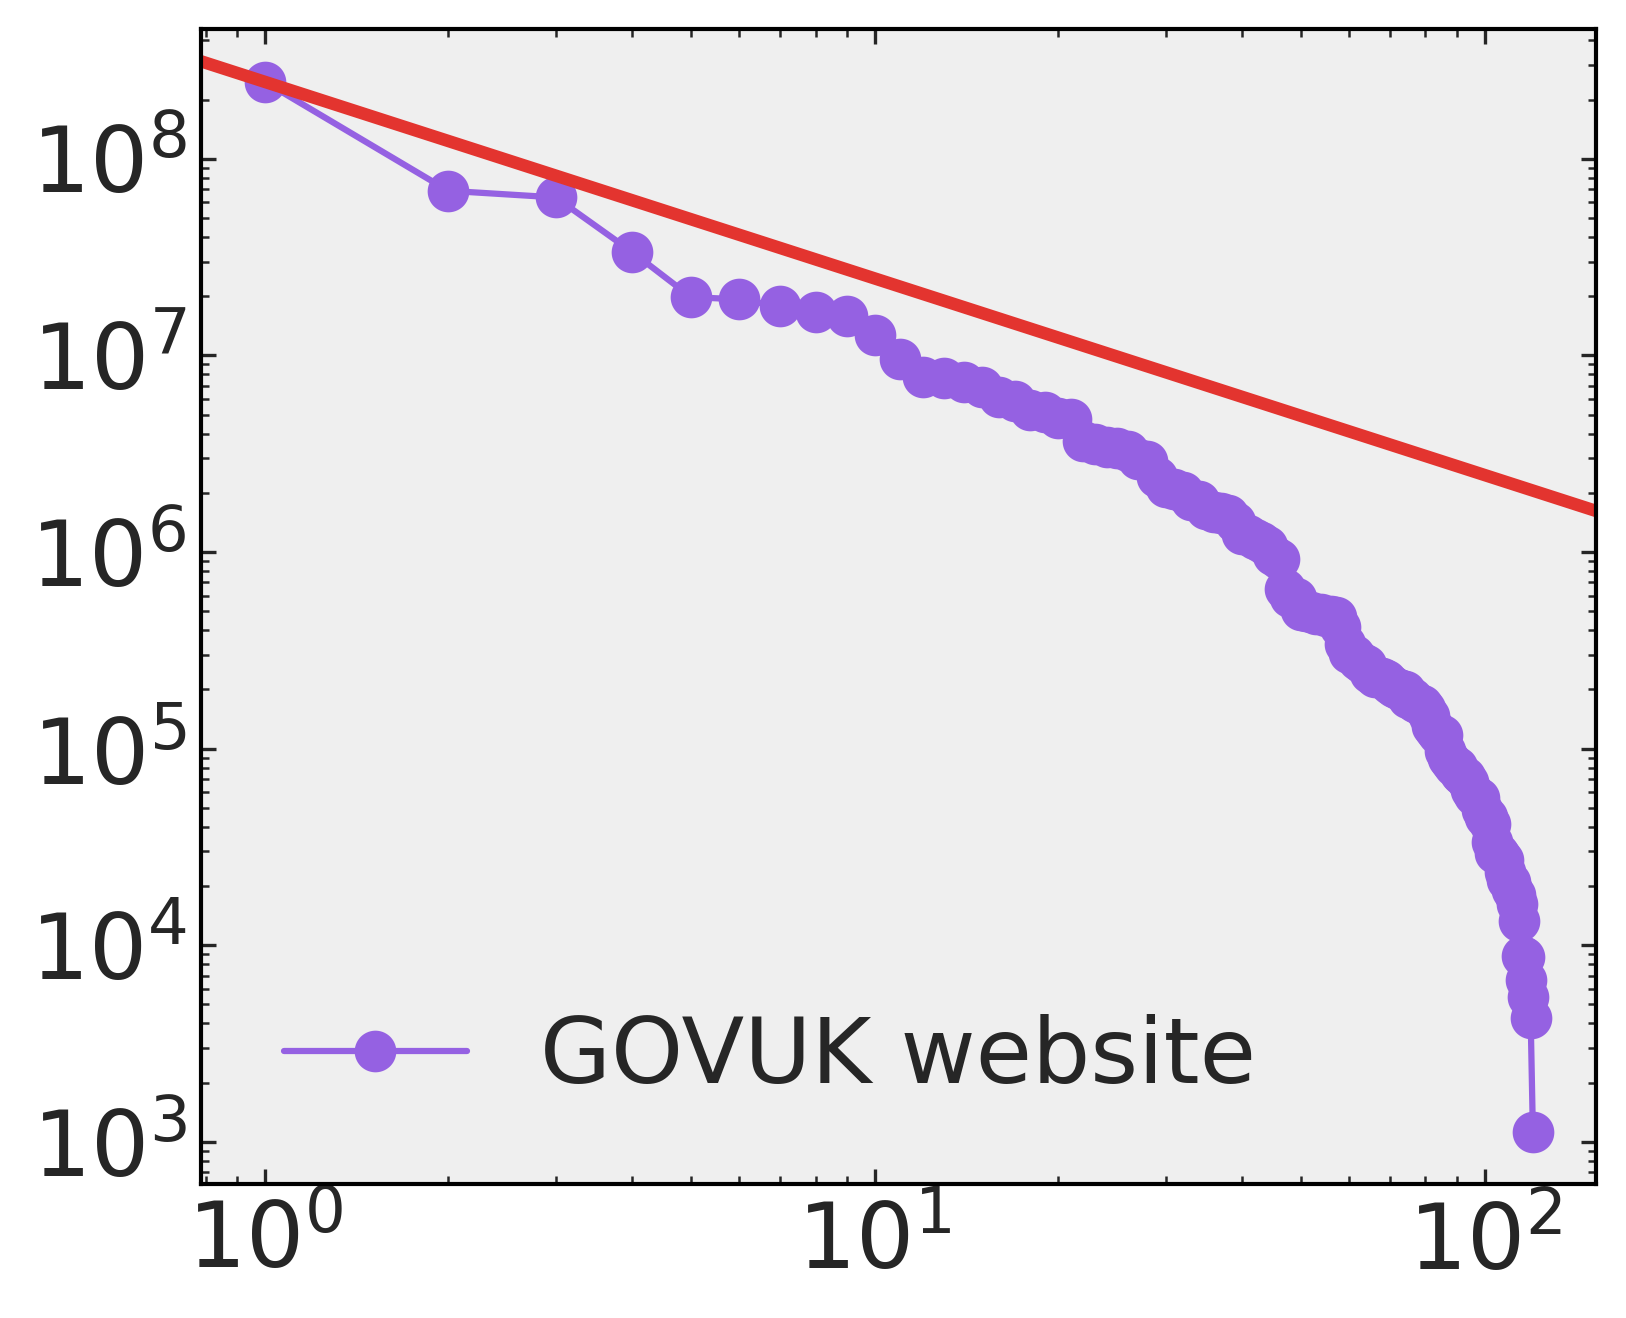

In [17]:
def plot_2012_visits_data(save=False):
    """
    Plot the visits data for GOVUK websites in 2012.

    Parameters:
        save (bool): If True, save the plot as a file. Default is False.

    Returns:
        None
    """
    # Load and preprocess the data
    visits2012_data = pd.read_csv(Path('../data/processed/201104-201203-govuk-unique-visitors-processed.csv'))
    visits2012_data.columns = [i.replace('_', '') for i in visits2012_data.columns]
    visits12_df = visits2012_data.dropna(how='any')
    visits12_df['visits'] = visits12_df.sum(axis=1, numeric_only=True)
    visits12_df = visits12_df.loc[:, ['URL', 'visits']].sort_values('visits', ascending=False)

    # Combine the top two rows
    visits12_df.iloc[0, 1] = visits12_df.iloc[0, 1] + visits12_df.iloc[1, 1]
    visits12_df.drop(3, inplace=True)
    visits12_df = visits12_df.reset_index().drop(columns='index')

    n = len(visits12_df)
    ranks = range(1, n + 1)
    visits12_df['rank'] = ranks
    freqs = list(visits12_df.visits)

    # Create the figure and axis
    figure = plt.figure(figsize=(6,5), dpi=300)
    plt.rcParams["font.family"] = "Helvetica"
    ax = plt.subplot()

    line1, = ax.plot(ranks, freqs, linestyle="-", color='#9561e2', fillstyle='full',
                     marker="o", markersize=5, markeredgewidth=5, label='GOVUK website')
    line2 = ax.axline((1, freqs[0]), slope=-1, color='#e3342f', linewidth=3)

    # Set the face color
    plt.gca().set_facecolor('#efefef')

    ax.set_xlabel('',  fontsize=22)
    ax.set_ylabel('',  fontsize=22)
    ax.set_xscale('log')
    ax.set_yscale('log')
    ax.grid(False)  # Remove gridlines

    # Add major and minor ticks facing inwards
    ax.tick_params(
        axis='both',
        which='both',
        direction='in',
        top=True,
        right=True,
        bottom=True,
        left=True
    )

    # Axis label size
    plt.xticks(fontsize = 22) 
    plt.yticks(fontsize = 22) 

    
    plt.legend(
        handles=[line1, line2], frameon=False, fancybox=False, loc='lower left',
        facecolor='white', framealpha=1, edgecolor='black', fontsize=22,
    )

    # Modify the spines
    ax.spines['top'].set_color('black')  # Remove top spine
    ax.spines['right'].set_color('black')  # Remove right spine
    ax.spines['left'].set_linewidth(1)
    ax.spines['left'].set_color('black')
    ax.spines['bottom'].set_linewidth(1)
    ax.spines['bottom'].set_color('black')
    ax.spines['right'].set_linewidth(1)
    ax.spines['top'].set_linewidth(1)

    # Save figure
    if save == True:
        plt.savefig("../reports/figures/supplementary-figures/figSM3-inset.png", dpi=300)
    else:
        plt.show()

# Usage
plot_2012_visits_data(save=True)

### Figure SM4a

[nltk_data] Downloading package wordnet to /home/vincents/nltk_data...
[nltk_data]   Package wordnet is already up-to-date!
[nltk_data] Downloading package omw-1.4 to /home/vincents/nltk_data...
[nltk_data]   Package omw-1.4 is already up-to-date!
/tmp/ipykernel_8162/3453104841.py:45: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  verbs_2012_df['verb'] = verbs_2012_df['service'].apply(extract_first_verb)
/tmp/ipykernel_8162/3453104841.py:110: UserWarning: set_ticklabels() should only be used with a fixed number of ticks, i.e. after set_ticks() or using a FixedLocator.
  ax.set_yticklabels(top_10_verbs['verb'], fontsize=20)
/tmp/ipykernel_8162/3453104841.py:111: UserWarning: set_ticklabels() should only be used with a fixed number of ticks, i.e. af

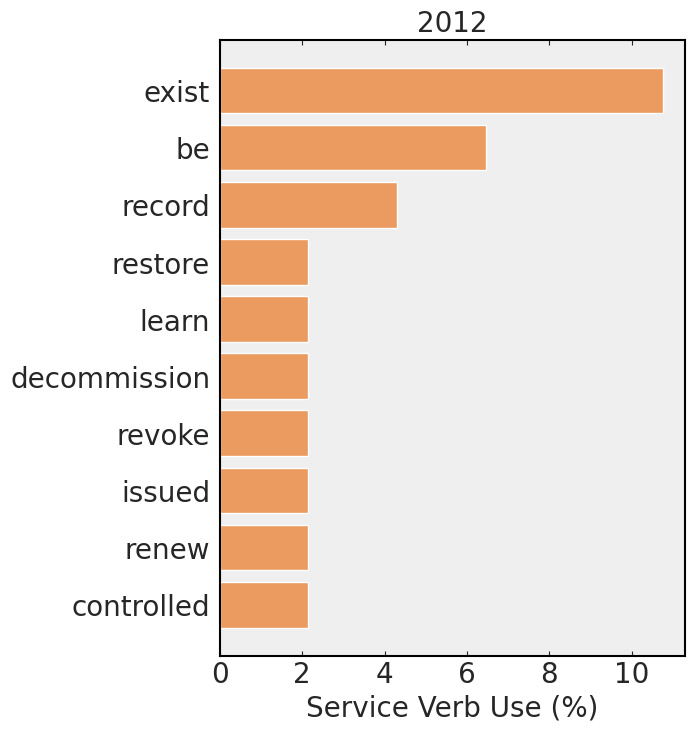

In [21]:
# Define function to extract the first verb from a text
def extract_first_verb(text):
    words = word_tokenize(text)
    pos_tags = pos_tag(words)
    
    for word, pos in pos_tags:
        if pos.startswith('V'):
            return word
    
    return None
    
# Load data
transactions_data = pd.read_csv(
    '../data/processed/201204-201703-service-transactions-processed.csv'
)

# Function to lemmatize a verb
def lemmatize_verb(verb):
    # Define the part of speech (POS) for WordNet lemmatizer
    pos = wordnet.VERB if verb.endswith('e') else wordnet.VERB if 'ing' in verb else wordnet.NOUN
    
    # Lemmatize the verb
    return lemmatizer.lemmatize(verb, pos)

# Extract the first word from each string
verbs_2012_df = transactions_data.loc[(transactions_data['201212'] > 0)]
first_words = verbs_2012_df['service'].str.split().str[0]

# Convert the result to a list
first_words_list = first_words.tolist()

# Check if 'punkt' and 'averaged_perceptron_tagger' are downloaded; if not, download them
try:
    nltk.data.find('tokenizers/punkt')
    nltk.data.find('taggers/averaged_perceptron_tagger')
    nltk.download('wordnet')
    nltk.download('omw-1.4')
except LookupError:
    nltk.download('punkt')
    nltk.download('averaged_perceptron_tagger')
    nltk.download('wordnet')
    nltk.download('omw-1.4')

# Apply the exatract_first_verb function to create the 'verb' column
verbs_2012_df['verb'] = verbs_2012_df['service'].apply(extract_first_verb)

# Format DataFrame
verbs_2012_df = pd.DataFrame.from_dict(verbs_2012_df.verb.value_counts()).reset_index()
verbs_2012_df.rename(columns={'index': 'verb', 'verb': 'freq'}, inplace=True)
verbs_2012_df['verb'] = verbs_2012_df['verb'].str.lower()

# Add percentage for each verb
verbs_2012_df['perc'] = (verbs_2012_df['freq'] / verbs_2012_df['freq'].sum()) * 100

# Initialize the WordNet lemmatizer
lemmatizer = WordNetLemmatizer()

# Apply lemmatization to the 'verb' column to get root form of verbs
verbs_2012_df['verb'] = verbs_2012_df['verb'].apply(lemmatize_verb)

# Set the font to Helvetica
rcParams['font.family'] = 'sans-serif'
rcParams['font.sans-serif'] = ['Helvetica']

# Create a new figure with a white background
fig, ax = plt.subplots(figsize=(6, 8))
fig.patch.set_facecolor('white')
ax.set_facecolor('#efefef')

# Plot the chart for the top 10 verbs
top_10_verbs = verbs_2012_df.head(10)
plt.barh(top_10_verbs['verb'], top_10_verbs['perc'], color='#eb9a60')

# Add title and labels
plt.xlabel('Service Verb Use (%)', fontsize=20)
plt.title('2012', fontsize=20)
plt.ylabel('')

# Format the plot
plt.gca().invert_yaxis()
ax.grid(False)  # Remove gridlines

# Set tick labels
ax.tick_params(
    axis='y',
    which='both',
    left=False,
    right=False,
    labelright=False
)

ax.tick_params(
    axis='x',
    which='minor',
    top=False,
    bottom=False,
    labelright=False
)

ax.tick_params(
    direction='in',
    axis='x',
    which='major',
    top=True,
    bottom=True,
    labelright=False
)

# Set axes labels and font size
ax.set_yticklabels(top_10_verbs['verb'], fontsize=20)
ax.set_xticklabels([0, 2, 4, 6, 8, 10], fontsize=20)


# Modify the spines
ax.spines['top'].set_color('black')  # Remove top spine
ax.spines['right'].set_color('black')  # Remove right spine
ax.spines['left'].set_linewidth(1.5)
ax.spines['left'].set_color('black')
ax.spines['bottom'].set_linewidth(1.5)
ax.spines['bottom'].set_color('black')
ax.spines['right'].set_linewidth(1.5)
ax.spines['top'].set_linewidth(1.5)

# Save figure
plt.savefig("../reports/figures/supplementary-figures/figSM4a.png", dpi=300, bbox_inches='tight')

# Show the plot
plt.show()

### Figure SM4b

/tmp/ipykernel_8162/1244845092.py:99: UserWarning: set_ticklabels() should only be used with a fixed number of ticks, i.e. after set_ticks() or using a FixedLocator.
  ax.set_yticklabels(verbs_2022_df.verb, fontsize=20)
findfont: Generic family 'sans-serif' not found because none of the following families were found: Helvetica
findfont: Generic family 'sans-serif' not found because none of the following families were found: Helvetica
findfont: Generic family 'sans-serif' not found because none of the following families were found: Helvetica
findfont: Generic family 'sans-serif' not found because none of the following families were found: Helvetica
findfont: Generic family 'sans-serif' not found because none of the following families were found: Helvetica
findfont: Generic family 'sans-serif' not found because none of the following families were found: Helvetica
findfont: Generic family 'sans-serif' not found because none of the following families were found: Helvetica
findfont: Generic

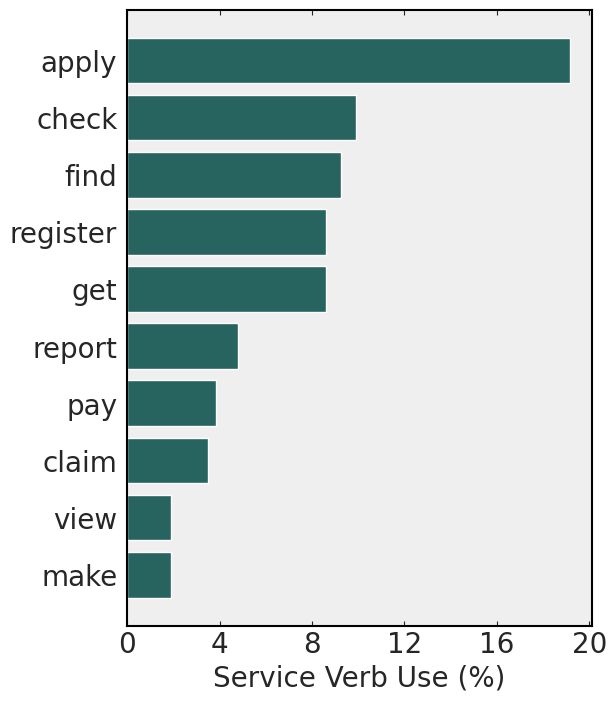

In [20]:
def load_and_process_data(file_path):
    """
    Load and process service verb data from an Excel file.

    Args:
        file_path (str): Path to the Excel file containing service verb data.

    Returns:
        pd.DataFrame: Processed DataFrame with verb frequencies and percentages.
    """
    # Load data from the Excel file
    services_data = pd.read_excel(file_path)

    # Get verb frequencies
    verbs = services_data['verb'].value_counts()

    # Create a DataFrame to store verb frequencies
    verbs_df = pd.DataFrame({'verb': verbs.index, 'freq': verbs.values})

    # List of verbs to exclude
    excluded_verbs = [
        'Apply', 'Check', 'Get', 'Register', 'Find', 'Report', 'Claim',
        'View', 'Pay', 'Submit', 'Manage', 'Book', 'Make', 'Create',
        'Appeal', 'Search', 'File', 'Use', 'Send', 'Sign', 'Ask', 'Explore',
        'Publish', 'Change', 'Prove', 'Plan', 'Look', 'Order', 'Tell', 'Help',
        'Fill', 'Support', 'Refer', 'Declare', 'Request', 'Complain', 'Accept',
        'Verify', 'Update', 'Cancel', 'Remove', 'Recruit', 'Calculate', 'Track',
        'Renew', 'Give', 'Record', 'Respond', 'Comply', 'Complete', 'Analyse',
        'Replace', 'Download', 'Repay', 'Add', 'Visit', 'Reply', 'Evict', 'Offer'
    ]

    # Filter out non-verbs
    verbs_df = verbs_df[~verbs_df["verb"].isin(excluded_verbs) == False]

    # Convert verbs to lowercase
    verbs_df['verb'] = verbs_df['verb'].str.lower()

    # Calculate verb frequencies as percentages
    verbs_df['perc'] = (verbs_df['freq'] / verbs_df['freq'].sum()) * 100

    return verbs_df

# Specify the file path for the Excel data
file_path = '../data/processed/202308-services-list-processed.xlsx'

# Load and process the data
verbs_2022_df = load_and_process_data(file_path)

# Set the font to Helvetica
rcParams['font.family'] = 'sans-serif'
rcParams['font.sans-serif'] = ['Helvetica']

# Create a new figure with a white background
fig, ax = plt.subplots(figsize=(6, 8))
fig.patch.set_facecolor('white')
ax.set_facecolor('#efefef')

# Plot the chart
plt.barh(verbs_2022_df.iloc[:10, :].verb, verbs_2022_df.iloc[:10, :].perc, color='#27635f')

# Add title and labels
plt.title('', fontsize=18)
plt.xlabel('Service Verb Use (%)', fontsize=20)
plt.ylabel('')

# Format the plot
plt.gca().invert_yaxis()
ax.grid(False)  # Remove gridlines

# Set tick labels
ax.tick_params(
    axis='y',
    which='both',
    left=False,
    right=False,
    labelright=False
)

ax.tick_params(
    axis='x',
    which='minor',
    top=False,
    bottom=False,
    labelright=False
)

ax.tick_params(
    direction='in',
    axis='x',
    which='major',
    top=True,
    bottom=True,
    labelright=False
)


# Set axes labels and font size
plt.xticks(range(0, 21, 4), fontsize=20)
ax.set_yticklabels(verbs_2022_df.verb, fontsize=20)

# Modify the spines
ax.spines['top'].set_color('black')  # Remove top spine
ax.spines['right'].set_color('black')  # Remove right spine
ax.spines['left'].set_linewidth(1.5)
ax.spines['left'].set_color('black')
ax.spines['bottom'].set_linewidth(1.5)
ax.spines['bottom'].set_color('black')
ax.spines['right'].set_linewidth(1.5)
ax.spines['top'].set_linewidth(1.5)

plt.savefig("../reports/figures/supplementary-figures/figSM4b.png", dpi=300, bbox_inches='tight');